Questions: 
1.Need some clarification on what testing and training score mean.
2.are we using the correct variables for X and y


In [206]:
#import librabries and dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [207]:
#load in the data from the csv, naming df as temp since we are concerned with how temperature affects weekly sales
external_factors = pd.read_csv('Retail_Sales_Data/Official_Merged_SF.csv')
external_factors = external_factors.dropna()
external_factors .head(20)

,sale_date,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales
62,2011-11-11,16,29.56,3.505,5042.40,2193.04,200.11,3309.98,2743.18,6.232,False,28,468.42
63,2011-11-18,16,31.73,3.479,2089.46,154.21,3.55,830.60,4425.07,6.232,False,28,279.22
64,2011-11-25,16,31.39,3.424,90.28,126.47,34754.69,24.64,1560.32,6.232,True,28,349.09
66,2011-12-23,16,20.79,3.173,485.00,0.18,475.60,16.20,960.85,6.232,False,28,575.78
67,2011-12-30,16,23.91,3.119,921.67,11778.68,101.87,272.51,1673.25,6.232,True,28,685.46
68,2012-06-01,16,58.97,3.764,4078.25,22.40,60.41,98.46,968.96,6.169,False,28,585.91
69,2012-01-13,16,19.55,3.077,1353.58,2551.73,0.24,289.67,1899.49,6.162,False,28,382.02
70,2012-01-20,16,29.30,3.055,2087.19,1399.47,5.58,75.83,4742.74,6.162,False,28,354.85
75,2012-02-03,16,25.53,3.031,32702.46,747.82,2.39,8063.07,2940.68,6.162,False,28,318.90
76,2012-03-16,16,38.02,3.486,3501.15,0.30,1.33,1396.55,1515.46,6.162,False,28,285.96


In [208]:
external_factors.describe()
#wanted to see a breakdown of each column

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,dept,weekly_sales
count,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000,149916.000000
mean,20.407962,56.142811,3.625916,8219.364039,4540.034708,2195.387004,3640.162209,4676.753767,7.438743,44.259025,17732.379816
std,12.050228,17.570431,0.287172,9526.141811,11243.299433,12408.825263,7538.605585,5657.840798,1.707847,30.109156,24698.328688
min,1.000000,7.460000,3.031000,32.500000,-265.760000,-1.000000,0.460000,170.640000,4.077000,1.000000,-798.000000
25%,11.000000,42.520000,3.413000,3156.680000,51.730000,4.590000,486.320000,2194.510000,6.403000,19.000000,2744.370000
50%,20.000000,56.550000,3.622000,5694.250000,236.960000,23.930000,1355.110000,3543.370000,7.348000,37.000000,8575.295000
75%,29.000000,70.410000,3.840000,9198.080000,3818.850000,120.080000,3301.810000,5659.570000,8.304000,72.000000,22520.290000
max,45.000000,95.610000,4.301000,88646.760000,104519.540000,141630.610000,67474.850000,105223.110000,12.890000,99.000000,630999.190000


In [209]:
#find the top stores based weekly sales
average_sales_week = external_factors.groupby(by=['sale_date'])['weekly_sales'].mean()
average_sales_week.head()

sale_date
2011-11-11    17454.543298
2011-11-18    16715.592049
2011-11-25    24969.808794
2011-12-16    24037.635557
2011-12-23    28885.653476
Name: weekly_sales, dtype: float64

In [210]:
#sorting the stores into top 3
top_stores = external_factors.groupby(by=['store'], as_index=False)['weekly_sales'].mean()
top_stores.sort_values('weekly_sales', ascending=False)[:3]

,store,weekly_sales
3,4,31014.221765
19,20,29834.637097
12,13,28571.410133


In [211]:
#store 4 is the highest grossing store, using it as a reference for the modeling
store_4 = external_factors.where(external_factors['store'] == 4)
store_4 = store_4.dropna()
store_4.sort_values('weekly_sales', ascending= False)[:3]
store_4.head(20)
#store_4.size


,sale_date,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales
201043,2011-11-11,4.0,47.12,3.286,12851.52,16658.47,430.13,5630.01,9213.39,5.143,0.0,1.0,36681.61
201044,2011-11-18,4.0,50.44,3.294,4539.94,840.56,372.90,613.96,5358.13,5.143,0.0,1.0,32494.43
201045,2011-11-25,4.0,47.96,3.225,561.45,137.88,83340.33,44.04,9239.23,5.143,1.0,1.0,33800.16
201046,2011-12-16,4.0,36.44,3.149,2756.67,72.30,1790.15,777.65,10261.95,5.143,0.0,1.0,73671.92
201047,2011-12-23,4.0,35.92,3.103,2461.94,69.05,2938.24,52.00,4396.76,5.143,0.0,1.0,91965.85
201048,2011-12-30,4.0,36.89,3.119,3496.13,72413.71,399.77,776.26,5012.53,5.143,1.0,1.0,36490.94
201049,2012-06-01,4.0,77.41,3.483,10165.22,8.60,47.93,2676.33,4896.34,4.308,0.0,1.0,28952.16
201050,2012-01-13,4.0,34.41,3.263,3666.28,14553.37,76.37,820.37,5955.28,4.607,0.0,1.0,29525.51
201051,2012-01-20,4.0,42.09,3.273,2109.41,7040.02,44.16,918.36,1116.83,4.607,0.0,1.0,32267.18
201052,2012-01-27,4.0,40.31,3.290,1346.06,3740.12,46.16,445.47,2451.89,4.607,0.0,1.0,31549.81


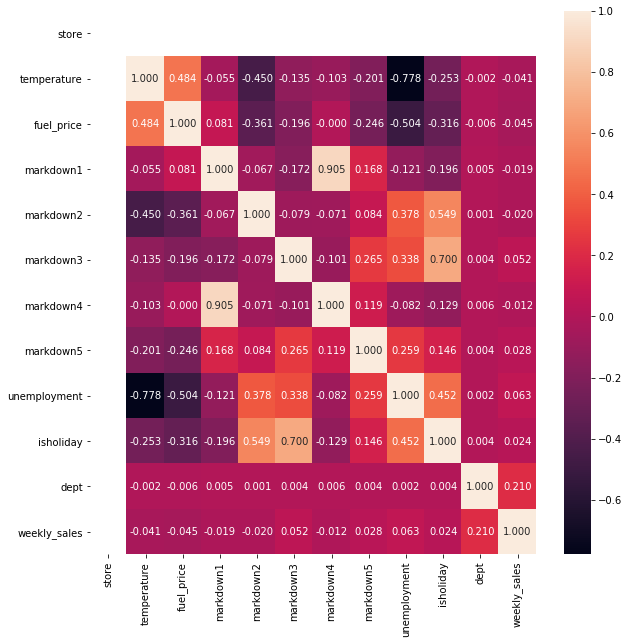

In [212]:
#creating a heat map for the correlation of the variables in regards to weekly sales
import seaborn as sns
corr = store_4.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()



In [213]:
#generating a list of correlation in regards to weekly sales 
corr['weekly_sales'].sort_values(ascending=False)


weekly_sales    1.000000
dept            0.209632
unemployment    0.063303
markdown3       0.052027
markdown5       0.027856
isholiday       0.023669
markdown4      -0.011846
markdown1      -0.019154
markdown2      -0.019823
temperature    -0.041045
fuel_price     -0.045415
store                NaN
Name: weekly_sales, dtype: float64

In [214]:
# assigning the data to X and y
X = external_factors[["isholiday", "dept", "fuel_price", "unemployment", "markdown1", "markdown2", "markdown3", "markdown4", "markdown5"]]
y = external_factors["temperature"].values.reshape(-1,1)
print(X.shape, y.shape)


(149916, 9) (149916, 1)


In [215]:
 # Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [216]:
# #  Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()



In [217]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
score = model.score(X, y)
print(f"R2 Score: {score}")



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")




R2 Score: 0.19918361917212124
Training Score: 0.19922398281955656
Testing Score: 0.1990526073162081


In [218]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y.min(), xmax=y.max())
# plt.title("Residual Plot")




In [220]:
# from sklearn.metrics import mean_squared_error

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)

# print(f"MSE: {MSE}, R2: {r2}")